In [1]:
from mc_moea import *

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
import imageio

In [3]:
import pickle
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [4]:
fname_l = glob.glob("solutions/*.pkl.bz2")

In [25]:
solutions = pd.read_pickle("solutions/iter_best-001.pkl")

In [26]:
solutions

,solution_id,solution_obj,from_generation,from_method,signal_strength,construction_cost,num_orphans,fitness_value
0,59d4f86c-59a7-4eed-b5e9-40cb0ec18cbf,Solution : 59d4f86c-59a7-4eed-b5e9-40cb0ec18cb...,0,Mutation,-103.079875,11040000,0,1.213090
0,df631d68-bdcd-4f03-9b9d-cc24735f054b,Solution : df631d68-bdcd-4f03-9b9d-cc24735f054...,1,Mutation,-100.879347,11450000,0,1.203335
0,ccbb216a-d85c-4202-a7cd-c2438e4ca7da,Solution : ccbb216a-d85c-4202-a7cd-c2438e4ca7d...,2,Crossover,-99.173527,12000000,0,1.201578
0,900e3ebb-7e84-4506-a5c1-306526fd02f0,Solution : 900e3ebb-7e84-4506-a5c1-306526fd02f...,1,Randomize,-100.226926,11510000,0,1.198904
0,ccbb216a-d85c-4202-a7cd-c2438e4ca7da,Solution : ccbb216a-d85c-4202-a7cd-c2438e4ca7d...,2,Crossover,-99.173527,12000000,0,1.201578
...,...,...,...,...,...,...,...,...
0,df1d9a81-a941-4600-82a5-f3566418c06f,Solution : df1d9a81-a941-4600-82a5-f3566418c06...,91,Crossover,-97.289179,10720000,0,1.152447
0,4b14536e-267b-4d72-9ecc-5e1070c0e2c3,Solution : 4b14536e-267b-4d72-9ecc-5e1070c0e2c...,63,Crossover,-99.838827,10440000,0,1.168626
0,4b14536e-267b-4d72-9ecc-5e1070c0e2c3,Solution : 4b14536e-267b-4d72-9ecc-5e1070c0e2c...,63,Crossover,-99.838827,10440000,0,1.168626
0,4b14536e-267b-4d72-9ecc-5e1070c0e2c3,Solution : 4b14536e-267b-4d72-9ecc-5e1070c0e2c...,63,Crossover,-98.698291,10440000,0,1.158257


In [24]:
pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[0].stations])

Text(0.5, 1.0, 'Pattern I (P = 0.32)')

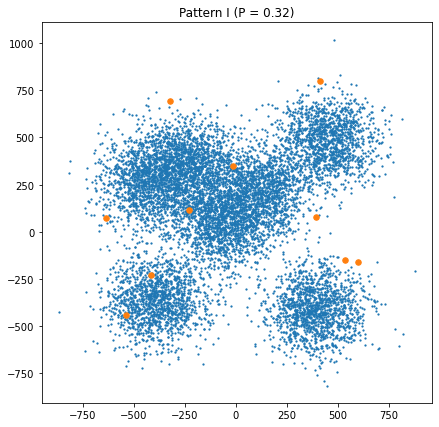

In [12]:
pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[0].stations])
plt.figure(figsize=(7,7))
plt.scatter(data[0][:,0], data[0][:,1], s=1.5)
plt.scatter(pos[:,0], pos[:,1], s=30)
plt.title("Pattern I (P = 0.32)")

In [22]:
for i in tqdm(range(solutions.shape[0])):
    pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[i].stations])
    plt.figure(figsize=(7,7))
    plt.scatter(data[0][:,0], data[0][:,1], s=1.5)
    plt.scatter(pos[:,0], pos[:,1], s=30)
    plt.title(f"Fitness: {solutions['solution_obj'].iloc[i].fitness:.4f}")
    plt.suptitle(f'Solutions from Iter: {i:04d}', fontsize=16)
    plt.savefig(f"figure/test/output-{i:04d}.png")
    plt.close()

  0%|          | 0/20 [00:00<?, ?it/s]

---

In [27]:
data = []
fnames = glob.glob("position/*.dat")
for fname in fnames:
    X = pickle.load(open(fname, "rb"))
    data.append(X)

In [28]:
bound_max = 800
bound_min = -800

In [29]:
for i in tqdm(range(solutions.shape[0])):
    pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[i].stations])
    fig, axs = plt.subplots(2,3, figsize=(17,10), sharex=True, sharey=True)
    fig.suptitle(f'Solutions from Iter: {i:04d}', fontsize=16)
    plt.xlim(-900, 900)
    plt.ylim(-900, 900)

    axs[0][0].scatter(data[0][:,0], data[0][:,1], s=1.5)
    axs[0][0].scatter(pos[:,0], pos[:,1], s=30)
    axs[0][0].set_title("Pattern I (P = 0.32)")

    axs[0][1].scatter(data[1][:,0], data[1][:,1], s=1.5)
    axs[0][1].scatter(pos[:,0], pos[:,1], s=30)
    axs[0][1].set_title("Pattern II (P = 0.25)")

    axs[0][2].scatter(data[2][:,0], data[2][:,1], s=1.5)
    axs[0][2].scatter(pos[:,0], pos[:,1], s=30)
    axs[0][2].set_title("Pattern III (P = 0.17)")

    axs[1][0].scatter(data[3][:,0], data[3][:,1], s=1.5)
    axs[1][0].scatter(pos[:,0], pos[:,1], s=30)
    axs[1][0].set_title("Pattern IV (P = 0.14)")

    axs[1][1].scatter(data[4][:,0], data[4][:,1], s=1.5)
    axs[1][1].scatter(pos[:,0], pos[:,1], s=30)
    axs[1][1].set_title("Pattern V (P = 0.09)")

    axs[1][2].scatter(data[5][:,0], data[5][:,1], s=1.5)
    axs[1][2].scatter(pos[:,0], pos[:,1], s=30)
    axs[1][2].set_title("Pattern VI (P = 0.03)")

    plt.savefig(f"figure/iter_best_001-{i:04d}.png")
    plt.close()

  0%|          | 0/101 [00:00<?, ?it/s]

In [32]:
with imageio.get_writer('figure/iter_best_001-animated.gif', mode='I', duration = 0.5) as writer:
    for filename in sorted(glob.glob("figure/iter_best_001*.png")):
        image = imageio.imread(filename)
        writer.append_data(image)

/tmp/ipykernel_255203/2258210362.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
